X_train shape is increasing that is (n++, 128, 128, 3) and we create batches with similar shapes of X_train

# New Section

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import random
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
import keras
from keras.applications.vgg16 import VGG16

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
n = 2
imgsize1 = 128
imgsize2 = 128

In [ ]:
# vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
# for layer in vgg.layers[:-4]:
#     layer.trainable = False
# model = Sequential()
# model.add(tf.keras.layers.TimeDistributed(vgg, input_shape=(None, 224, 224, 3)))
# model.add(tf.keras.layers.TimeDistributed(Flatten()))
# model.add(tf.keras.layers.LSTM(1024, return_sequences = True))
# model.add(Dropout(0.6))
# model.add(tf.keras.layers.LSTM(1024, return_sequences = True))
# model.add(Dropout(0.6))
# model.add(tf.keras.layers.TimeDistributed(Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.4))))
# model.add(tf.keras.layers.TimeDistributed(Dense(3, activation=tf.keras.layers.LeakyReLU(alpha=0.4))))
# tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

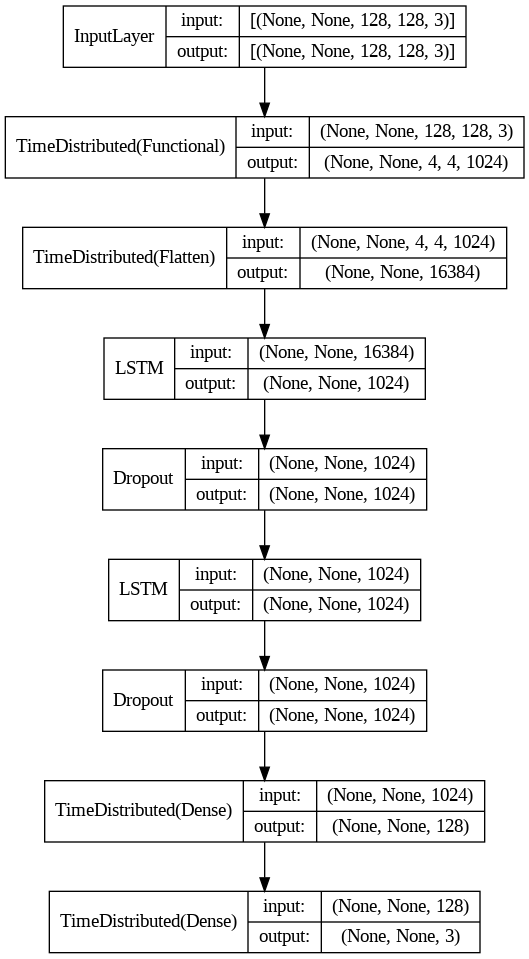

In [ ]:
vgg = tf.keras.applications.ConvNeXtBase(model_name="convnext_base",include_top=False,weights="imagenet",input_shape=(imgsize1,imgsize2,3))
for layer in vgg.layers[:-4]:
    layer.trainable = False
model = Sequential()
model.add(tf.keras.layers.TimeDistributed(vgg, input_shape=(None, imgsize1, imgsize2, 3)))
model.add(tf.keras.layers.TimeDistributed(Flatten()))
model.add(tf.keras.layers.LSTM(1024, return_sequences = True))
model.add(Dropout(0.2))
model.add(tf.keras.layers.LSTM(1024, return_sequences = True))
model.add(Dropout(0.2))
model.add(tf.keras.layers.TimeDistributed(Dense(128, activation='linear')))
model.add(tf.keras.layers.TimeDistributed(Dense(3, activation='linear')))
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
def R_Square(Y, Y_pred) :
  return 1 - (np.sum((Y-Y_pred)*(Y-Y_pred)))/(np.sum((Y - np.mean(Y))*(Y - np.mean(Y))))
def RMSE(Y, Y_pred) :
  return np.sqrt(np.mean((Y - Y_pred)*(Y - Y_pred)))
def RMSEDrift(Y, Y_pred) :
  return np.sqrt(np.mean((Y - Y_pred)*(Y - Y_pred)))/(np.mean(Y))

Data from folder 1
(450, 3) (450, 128, 128, 3) Training Shape (450, 3) (450, 128, 128, 3) Validation Shape
(12, 450, 128, 128, 3) (12, 450, 3) (12, 450, 128, 128, 3) (12, 450, 3)
450
Data from folder 2
(450, 3) (450, 128, 128, 3) Training Shape (450, 3) (450, 128, 128, 3) Validation Shape
(12, 450, 128, 128, 3) (12, 450, 3) (12, 450, 128, 128, 3) (12, 450, 3)
450
Data from folder 3
(450, 3) (450, 128, 128, 3) Training Shape (450, 3) (450, 128, 128, 3) Validation Shape
(12, 450, 128, 128, 3) (12, 450, 3) (12, 450, 128, 128, 3) (12, 450, 3)
450
Data from folder 4
(450, 3) (450, 128, 128, 3) Training Shape (450, 3) (450, 128, 128, 3) Validation Shape
(12, 450, 128, 128, 3) (12, 450, 3) (12, 450, 128, 128, 3) (12, 450, 3)
450
Data from folder 5
(450, 3) (450, 128, 128, 3) Training Shape (450, 3) (450, 128, 128, 3) Validation Shape
(12, 450, 128, 128, 3) (12, 450, 3) (12, 450, 128, 128, 3) (12, 450, 3)
450
Data from folder 6
(450, 3) (450, 128, 128, 3) Training Shape (450, 3) (450, 128, 128

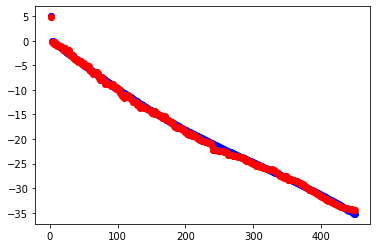

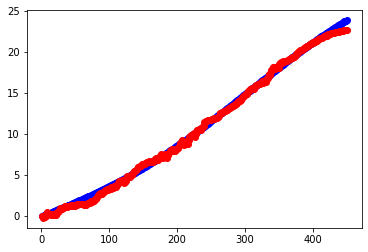

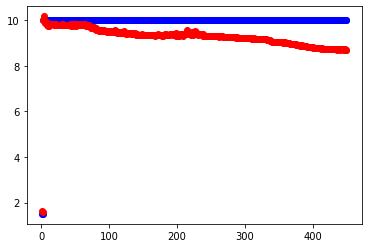

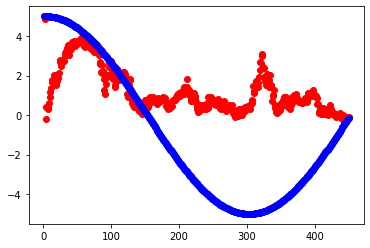

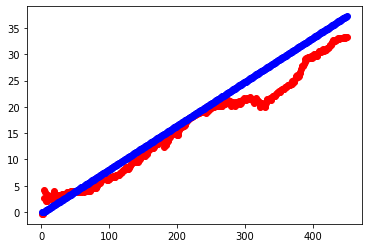

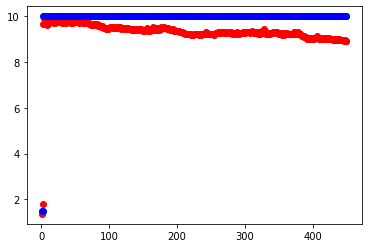

-2.955919555515567 -1.4370384771585385 30.0
1.9820585819416576 13.744979516394022 9.962222222222222


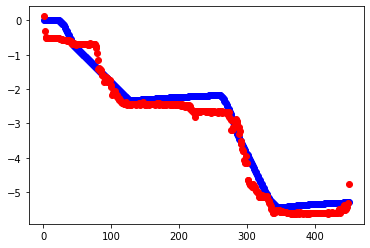

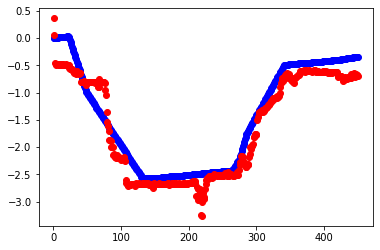

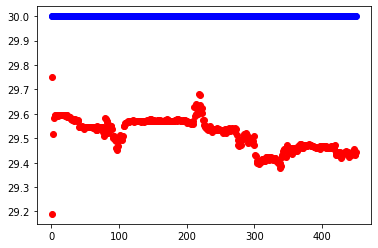

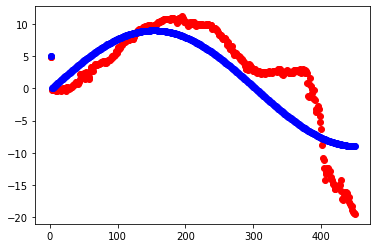

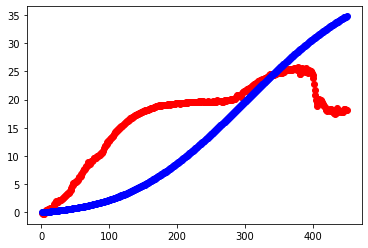

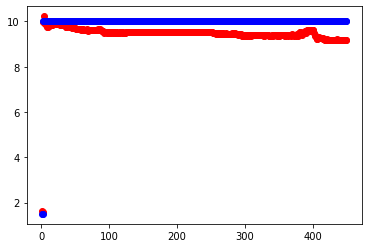

-1.3957117304439364 -3.8875963688197412 30.0
-2.1775199564021204 -4.119671762257467 30.0


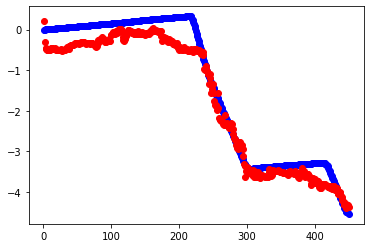

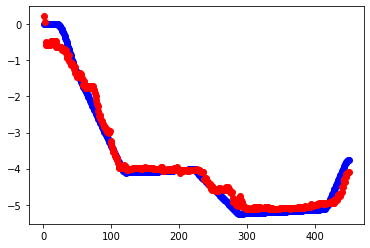

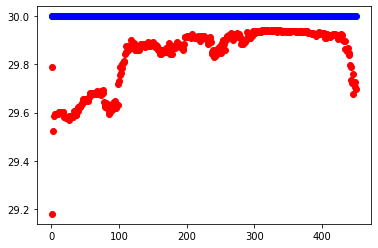

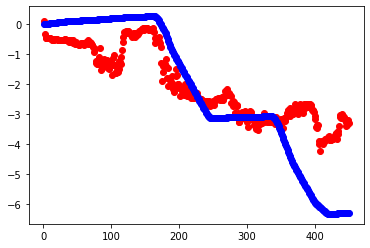

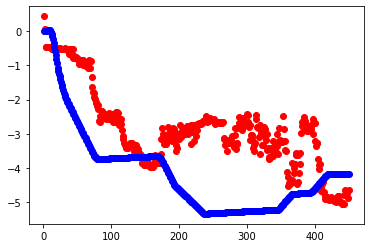

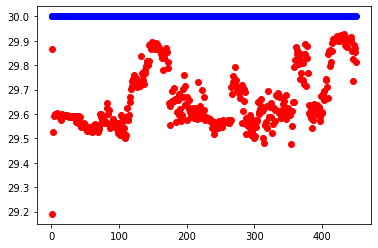

3.7524425508495836 18.651101754489872 9.962222222222222
-2.1775199564021204 -4.119671762257467 30.0


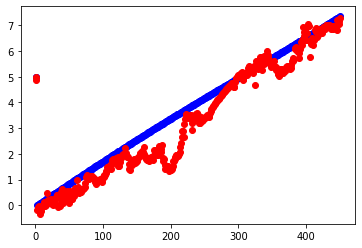

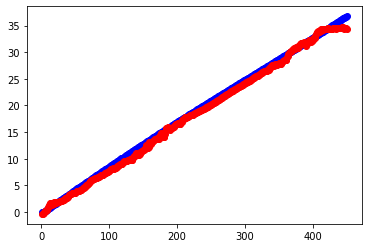

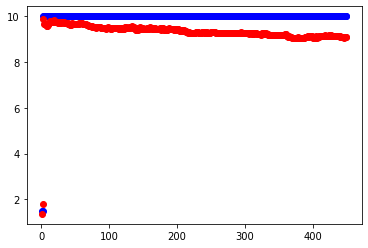

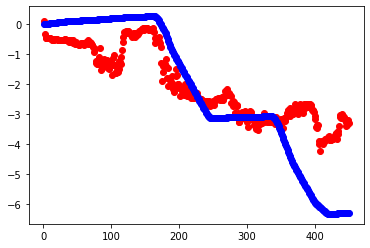

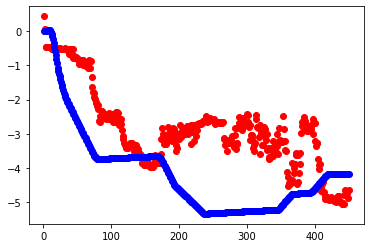

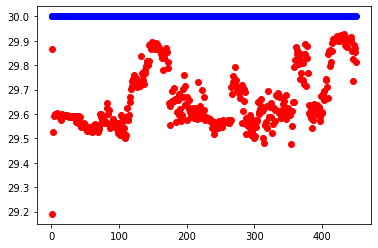

0.022222222222222223 18.542221961634027 9.962222222222222
2.0366666328410314 16.527777635869057 9.962222222222222


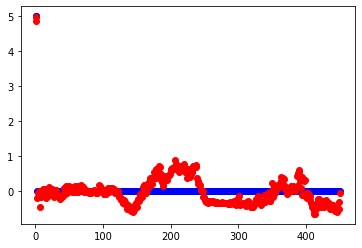

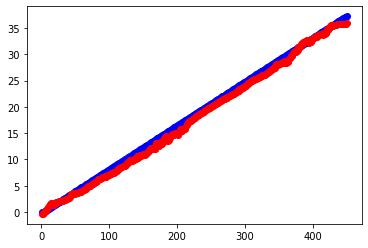

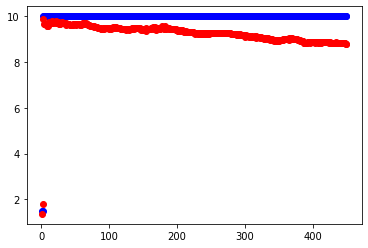

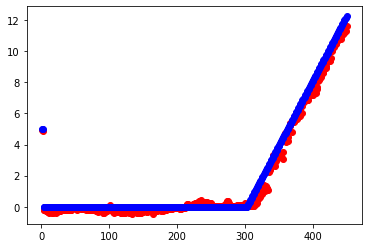

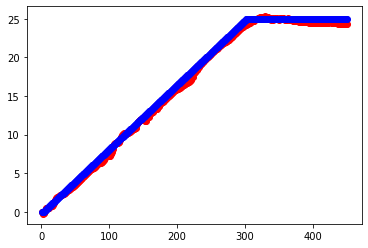

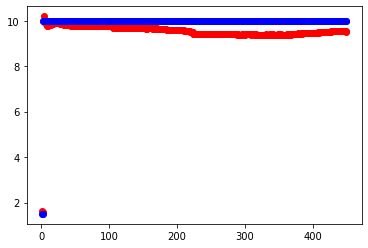

2.0366666328410314 16.527777635869057 9.962222222222222
0.022222222222222223 18.542221961634027 9.962222222222222


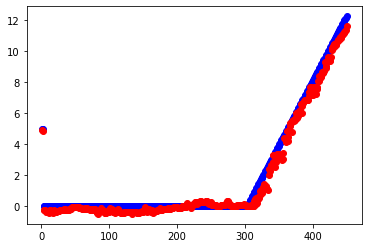

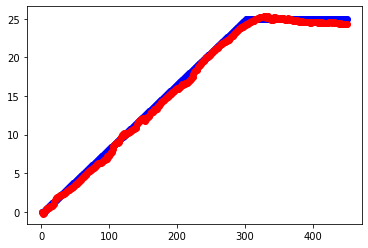

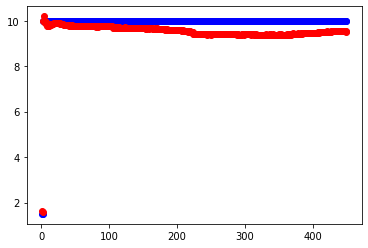

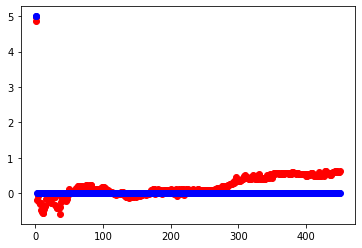

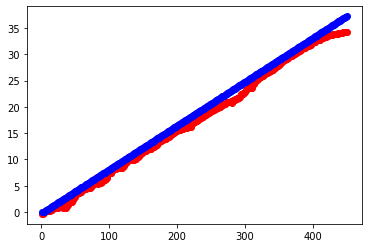

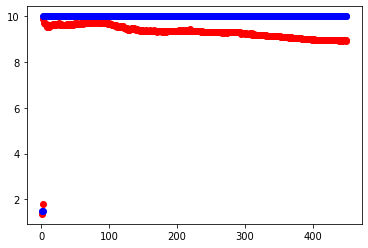

0.4148426208841718 18.542221961634027 9.962222222222222
5.938888831751214 14.555555489940776 9.962222222222222


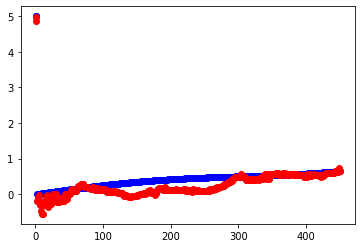

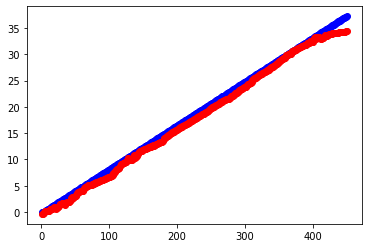

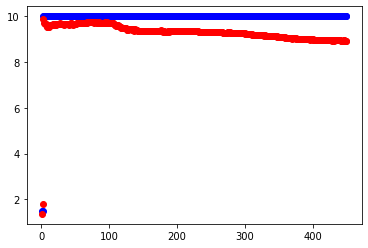

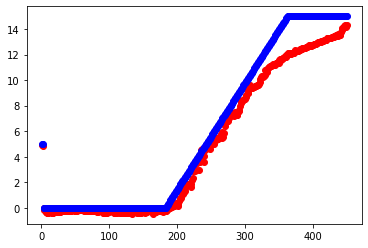

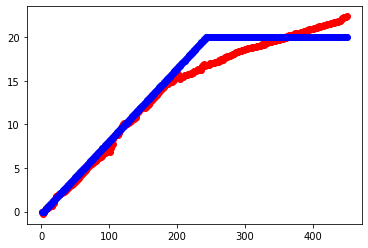

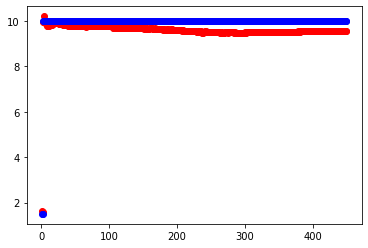

4.605833238048688 14.36399983520309 9.962222222222222
18.891083494822183 20.175418723854754 9.962222222222222


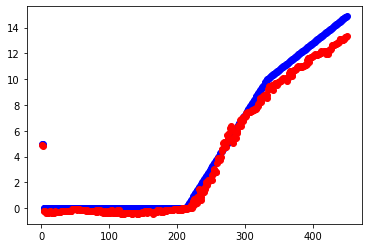

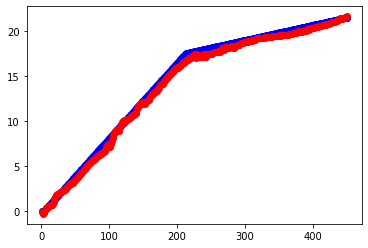

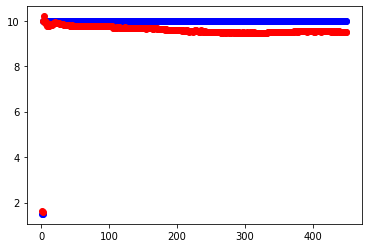

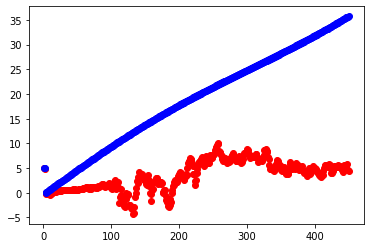

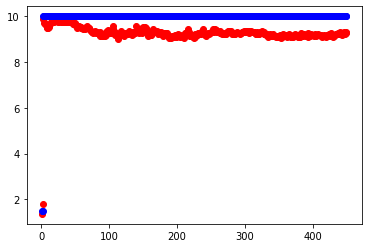

-18.19336030854119 16.909024939555675 9.962222222222222
16.00777747480406 13.904333201597133 9.962222222222222


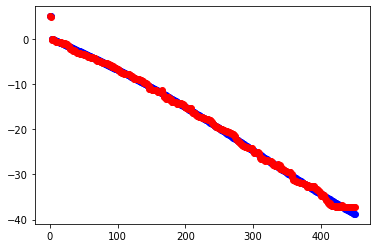

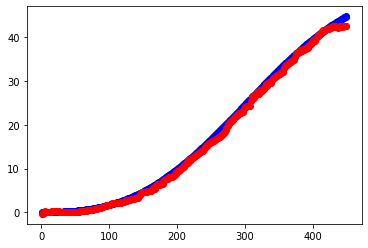

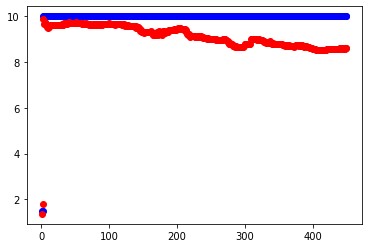

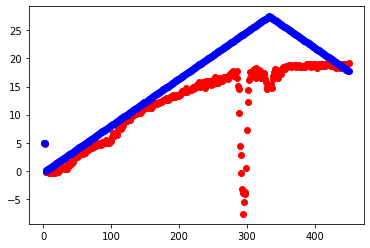

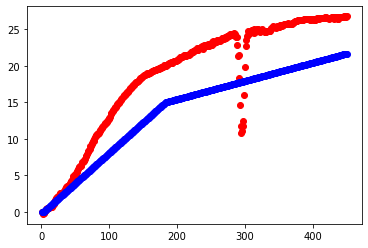

11.147555422683553 17.764110795872078 9.962222222222222
-17.540081537051332 17.562303759273554 9.962222222222222


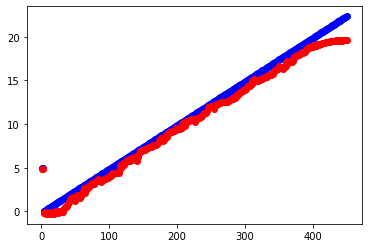

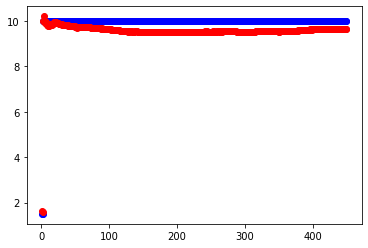

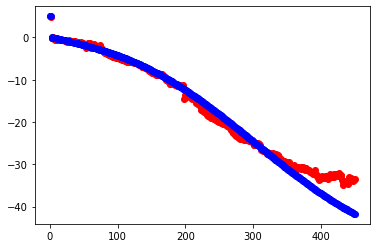

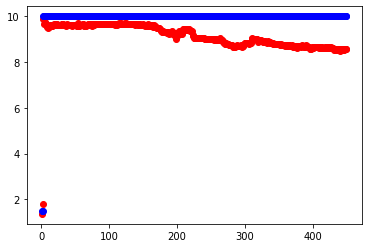

18.56444418385625 -1.0551186452309291 9.962222222222222
18.564444183856253 11.54177764331301 9.962222222222222


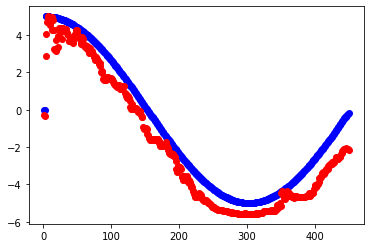

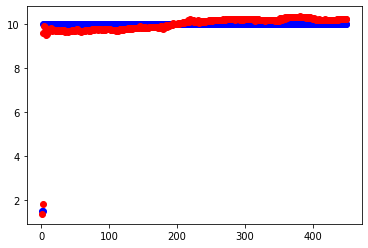

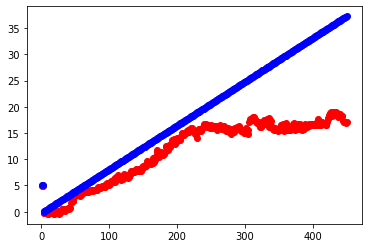

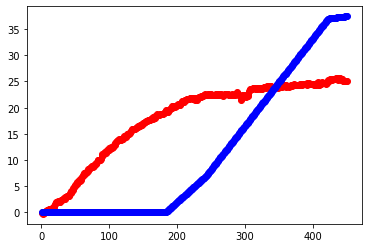

-29.645332787268693 1.9164444224867556 9.962222222222222
1.1110202010224264 -1.0551186452309291 9.962222222222222


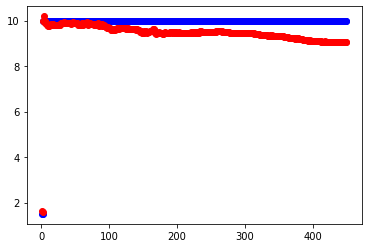

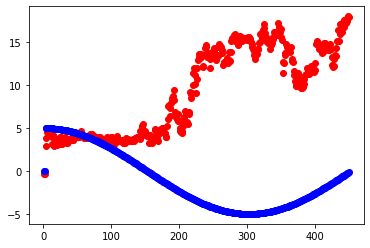

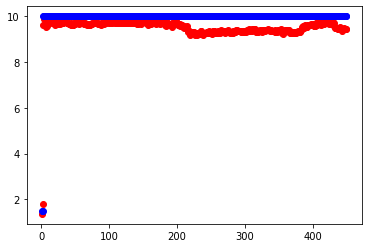

In [ ]:
def get_X(i, count2) :
  X = np.zeros((count2,imgsize1,imgsize2,3))
  if i == 2 or i == 3 or i == 15 or i == 16 :
    vidcap = cv2.VideoCapture('gdrive/My Drive/FYP-Data/Scenes Videos/{}/Basic _FirstMP4.avi'.format(i))
  else :
    vidcap = cv2.VideoCapture('gdrive/My Drive/FYP-Data/Scenes Videos/{}/Basic _FirstMP4.mp4'.format(i))
  count = 0
  while count<count2 :  
    success, image = vidcap.read()
    img = cv2.resize(image, (imgsize2,imgsize1))
    X[count,:,:,:] = np.copy(img)
    count += 1

  return X
def data_loader(i, n) :
  count2 = n
  X_train = get_X(i, count2)
  X_val = get_X(i+12, count2)
  Y_train = np.zeros((count2, 3))
  Y_val = np.zeros((count2, 3))
  Y_train[:,:] = np.array(pd.read_excel('gdrive/My Drive/FYP-Data/Scene Pos/{}/PositionData.xlsx'.format(i))).T[0:count2,:]
  Y_val[:,:] = np.array(pd.read_excel('gdrive/My Drive/FYP-Data/Scene Pos/{}/PositionData.xlsx'.format(i+12))).T[0:count2,:]
  print(Y_train.shape, X_train.shape, "Training Shape", Y_val.shape, X_val.shape, "Validation Shape")
  return Y_train, Y_val, X_train, X_val
for n in range(450, 451) :
  X_train = np.zeros((12, n, imgsize1, imgsize2, 3))
  X_val = np.zeros((12, n, imgsize1, imgsize2, 3))
  Y_train = np.zeros((12, n, 3))
  Y_val = np.zeros((12, n, 3))
  for i in range(1,13) :
    print("Data from folder", i)
    Y_t, Y_v, X_t, X_v = data_loader(i, n)
    X_train[i-1, :, :, :] = np.copy(X_t)
    Y_train[i-1, :, :] = np.copy(Y_t)
    X_val[i-1, :, :, :] = np.copy(X_v)
    Y_val[i-1, :, :] = np.copy(Y_v)
    print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)
    print(n)
    if i == 12 :
      model.load_weights('gdrive/My Drive/FYP-Data/Model_weights/Temporary_11')
      # history = model.fit(X_train, Y_train, validation_data = (X_val[0:2], Y_val[0:2]), batch_size = 1, epochs=100)
      # model.save_weights('gdrive/My Drive/FYP-Data/Model_weights/Temporary_11')
      Y_pred = np.zeros(Y_train.shape)
      Y_pred_val = np.zeros(Y_train.shape)
      for l in range(0,12) :
        Y_pred[l, :, :] = model.predict(X_train[l:l+1,:,:,:,:])
        Y_pred_val[l, :, :] = model.predict(X_val[l:l+1,:,:,:,:])
      print(R_Square(Y_train[:, :, 0:2], Y_pred[:, :, 0:2]), R_Square(Y_val[:, :, 0:2], Y_pred_val[:, :, 0:2]), 'R_square')
      print(RMSE(Y_train[:, :, 0:2], Y_pred[:, :, 0:2]), RMSE(Y_val[:, :, 0:2], Y_pred_val[:, :, 0:2]), 'RMSE')
      print(RMSEDrift(Y_train[:, :, 0:2], Y_pred[:, :, 0:2]), RMSEDrift(Y_val[:, :, 0:2], Y_pred_val[:, :, 0:2]), 'RMSEDrift')
      print(R_Square(Y_train, Y_pred), R_Square(Y_val, Y_pred_val), 'R_square_full')
      print(RMSE(Y_train, Y_pred), RMSE(Y_val, Y_pred_val), 'RMSE_full')
      print(RMSEDrift(Y_train, Y_pred), RMSEDrift(Y_val, Y_pred_val), 'RMSEDrift_full')
      for i in [0.01, 0.05, 0.1, 0.5, 1, 5, 10] :
        print(np.sum(np.abs(np.abs(Y_train[:, :, 0:2]) - np.abs(Y_pred[:, :, 0:2])) < i)/(Y_train.shape[0]*Y_train.shape[1]*2), "For {} training".format(i))
        print(np.sum(np.abs(np.abs(Y_val[:, :, 0:2]) - np.abs(Y_pred_val[:, :, 0:2])) < i)/(Y_val.shape[0]*Y_val.shape[1]*2), "For {} validation".format(i))
      if n%1 == 0 :
        for i in range(0,12) :
          X_axis = range(1,n+1)
          print(np.mean(Y_train[i,:,1]), np.mean(Y_train[i,:,0]), np.mean(Y_train[i,:,2]))
          print(np.mean(Y_val[i,:,1]), np.mean(Y_val[i,:,0]), np.mean(Y_val[i,:,2]))
          plt.scatter(X_axis, Y_train[i,:,1], c ="blue")
          plt.scatter(X_axis, Y_pred[i,:,1], c ="red")
          plt.show()
          plt.scatter(X_axis, Y_train[i,:,0], c ="blue")
          plt.scatter(X_axis, Y_pred[i,:,0], c ="red")
          plt.show()
          plt.scatter(X_axis, Y_train[i,:,2], c ="blue")
          plt.scatter(X_axis, Y_pred[i,:,2], c ="red")
          plt.show()
          X_axis = range(1,n+1)
          plt.scatter(X_axis, Y_pred_val[i,:,1], c ="red")
          plt.scatter(X_axis, Y_val[i,:,1], c ="blue")
          plt.show()
          plt.scatter(X_axis, Y_pred_val[i,:,0], c ="red")
          plt.scatter(X_axis, Y_val[i,:,0], c ="blue")
          plt.show()
          plt.scatter(X_axis, Y_pred_val[i,:,2], c ="red")
          plt.scatter(X_axis, Y_val[i,:,2], c ="blue")
          plt.show()   

In [ ]:
print(Y_train.shape, Y_pred.shape, Y_val.shape, Y_pred_val.shape)

(12, 450, 3) (12, 450, 3) (12, 450, 3) (12, 450, 3)


In [ ]:
import pandas as pd

def write_to_file(arr, i, sttr) :
## convert your array into a dataframe
  x = arr[:, 0]
  y = arr[:, 1]
  z = arr[:, 2]
  df = pd.DataFrame({'x': x, 'y': y, 'z':z})
  ## save to xlsx file

  filepath = 'file{}{}mobilenet.xlsx'.format(sttr, i)

  df.to_excel(filepath, index=False)

In [ ]:
for i in range(0,12) :
  write_to_file(Y_train[i,:,:], i, 'train')
  write_to_file(Y_pred[i,:,:], i, 'train_pred')
  write_to_file(Y_val[i,:,:], i, 'val')
  write_to_file(Y_pred_val[i,:,:], i, 'val_pred')

In [ ]:
import matplotlib.pylab as plt
import pandas as pd

# Keep this value as "train" for training plots and 
# "val" for validation plots.
# training_or_val = "train"
training_or_val = "val"

saving_location = "static plots/" + training_or_val + "/"
saving_file_name_prefix = training_or_val
saving_file_name_suffix = "mobilenet_val"
saving_file_format = ".png"

actual_data_file_name_prefix = "file" + training_or_val
# actual_data_file_name_prefix = "validation_data/file" + training_or_val
actual_data_file_name_suffix = "mobilenet.xlsx"

predicted_data_file_name_prefix = "file" + training_or_val +"_pred"
# predicted_data_file_name_prefix = "validation_data/file" + training_or_val +"_pred"
predicted_data_file_name_suffix = "mobilenet.xlsx"

number_of_files = 11

for i in range(0, number_of_files+1):
	fig = plt.figure()
	ax = plt.axes(projection='3d')
	
	actual_location_data = actual_data_file_name_prefix + str(i) + actual_data_file_name_suffix
	df = pd.read_excel(actual_location_data, sheet_name=0)
	x, y, z = list(df['x']), list(df['y']), list(df['z'])

	predicted_location_data = predicted_data_file_name_prefix + str(i) + predicted_data_file_name_suffix
	df2 = pd.read_excel(predicted_location_data, sheet_name=0)
	x2, y2, z2 = list(df2['x']), list(df2['y']), list(df2['z'])

	ax.plot3D(x, y, z, label='Actual Drone path') 
	ax.plot3D(x2, y2, z2, label='Predicted Drone path') 
	
	plt.legend()
	
	ax.set_xlabel('x')	
	ax.set_ylabel('y')
	ax.set_zlabel('z')
	
	plt.savefig(str(i) + saving_file_name_suffix + saving_file_format)
	
	plt.clf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>